This notebook includes lots of examples for making simple visualizations using the matplotlib package.

In [1]:
import random

import matplotlib.ticker as ticker
from matplotlib import colors as col
import matplotlib.pyplot as plt
%matplotlib inline

### Data spread

In [2]:
points = random.sample(range(100), 40)
points_collection = [random.sample(range(100), 40) for a in range(4)]
colors = ['blue', 'red', 'green', 'orange', 'yellow', 'purple', 'grey']

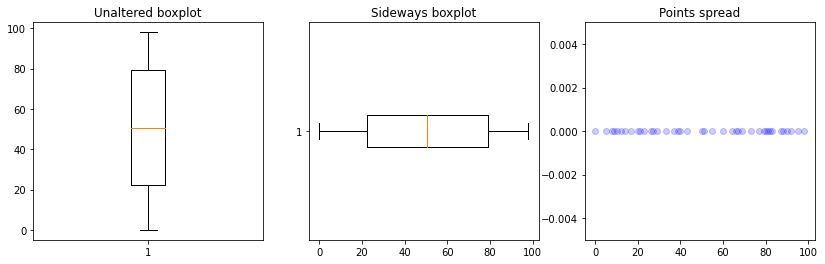

In [3]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(131)
ax.boxplot(points)
ax.set_title("Unaltered boxplot")

bx = fig.add_subplot(132)
bx.boxplot(points, vert=False)
bx.set_title("Sideways boxplot")

cx = fig.add_subplot(133)
cx.scatter(points, [0] * len(points), color='blue', alpha=0.2)
cx.set_ylim([-0.005, 0.005])
cx.set_title('Points spread')
plt.show()

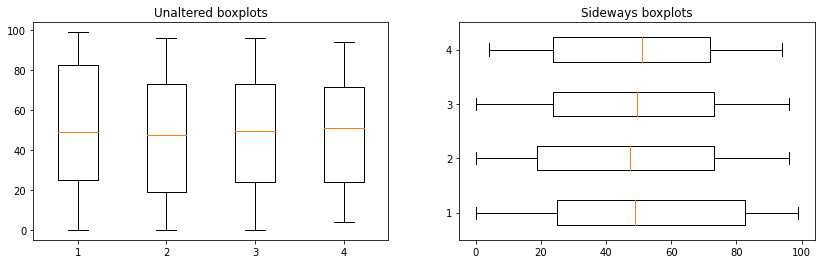

In [4]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)
ax.boxplot(points_collection)
ax.set_title("Unaltered boxplots")

bx = fig.add_subplot(122)
bx.boxplot(points_collection, vert=False)
bx.set_title("Sideways boxplots")
plt.show()

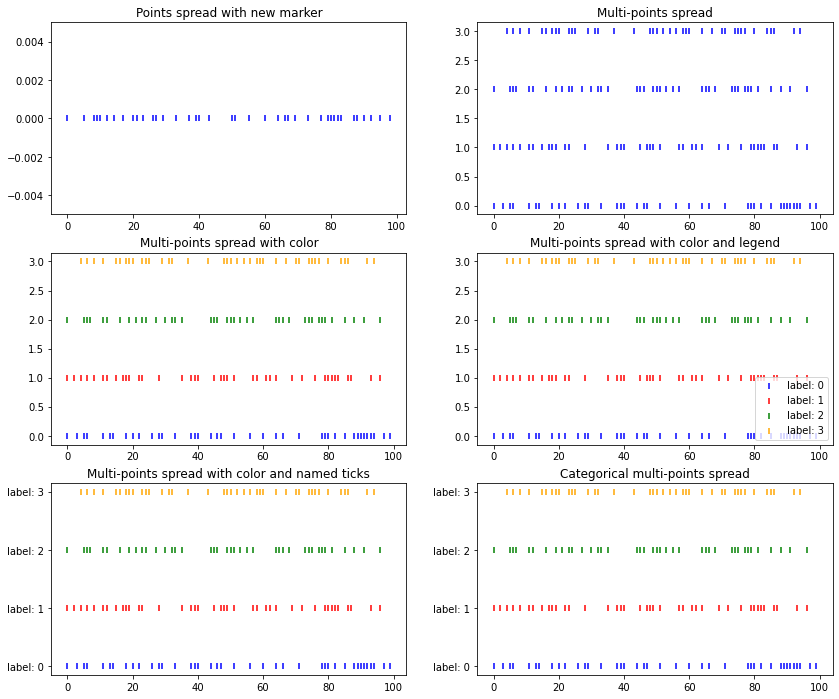

In [5]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(321)
ax.scatter(points, [0] * len(points), color='blue', marker='|')
ax.set_ylim([-0.005, 0.005])
ax.set_title('Points spread with new marker')

bx = fig.add_subplot(322)
bx.scatter(points_collection, [[a] * len(points_collection[0]) for a in range(4)], color='blue', marker='|')
bx.set_title('Multi-points spread')

cx = fig.add_subplot(323)
for index, x in enumerate(points_collection):
    cx.scatter(x, [index] * len(x), color=colors[index], marker='|')
cx.set_title('Multi-points spread with color')

dx = fig.add_subplot(324)
for index, x in enumerate(points_collection):
    dx.scatter(x, [index] * len(x), color=colors[index], marker='|', label='label: {}'.format(index))
dx.set_title('Multi-points spread with color and legend')
dx.legend(loc='lower right')

ex = fig.add_subplot(325)
for index, x in enumerate(points_collection):
    ex.scatter(x, [index] * len(x), color=colors[index], marker='|')
ex.set_yticks([index for index in range(4)])
ex.set_yticklabels(['label: {}'.format(index) for index in range(4)])
ex.set_title('Multi-points spread with color and named ticks')

fx = fig.add_subplot(326)
for index, x in enumerate(points_collection):
    fx.scatter(x, ['label: {}'.format(index)] * len(x), color=colors[index], marker='|')
fx.set_title('Categorical multi-points spread')

plt.show()

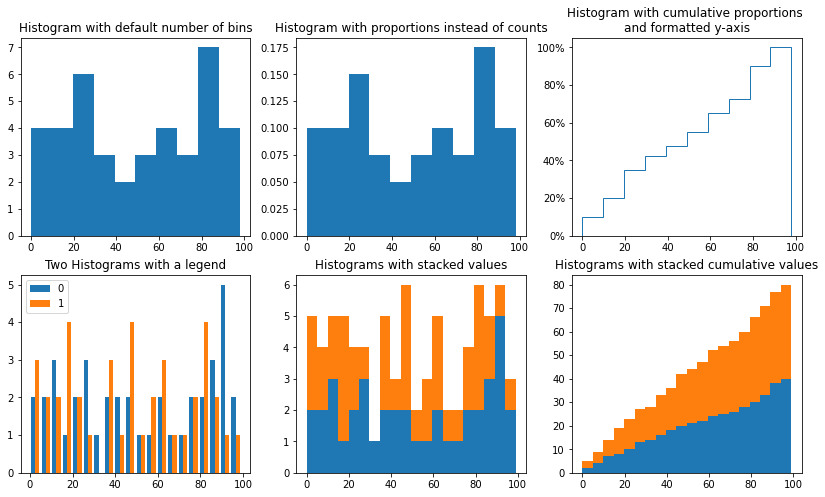

In [6]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(231)
ax.hist(points)
ax.set_title("Histogram with default number of bins")

bx = fig.add_subplot(232)
bx.hist(points, weights=[[1/len(points)] * len(points)])
bx.set_title("Histogram with proportions instead of counts")

cx = fig.add_subplot(233)
cx.hist(points, density=True, cumulative=True, histtype='step')

cx.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
cx.set_title("Histogram with cumulative proportions \nand formatted y-axis")

dx = fig.add_subplot(234)
dx.hist(points_collection[:2], bins=20, label=[0,1])
dx.set_title("Two Histograms with a legend")
dx.legend()

ex = fig.add_subplot(235)
ex.hist(points_collection[:2], bins=20, cumulative=False, histtype='barstacked')
ex.set_title("Histograms with stacked values")

fx = fig.add_subplot(236)
fx.hist(points_collection[:2], bins=20, cumulative=True, histtype='barstacked')
fx.set_title("Histograms with stacked cumulative values")

plt.show()

### Line charts

In [7]:
lines = []
for index in range(4):
    lines.append((range(10), [random.choice(range((index+1), (index+1)*5)) for a in range(10)]))

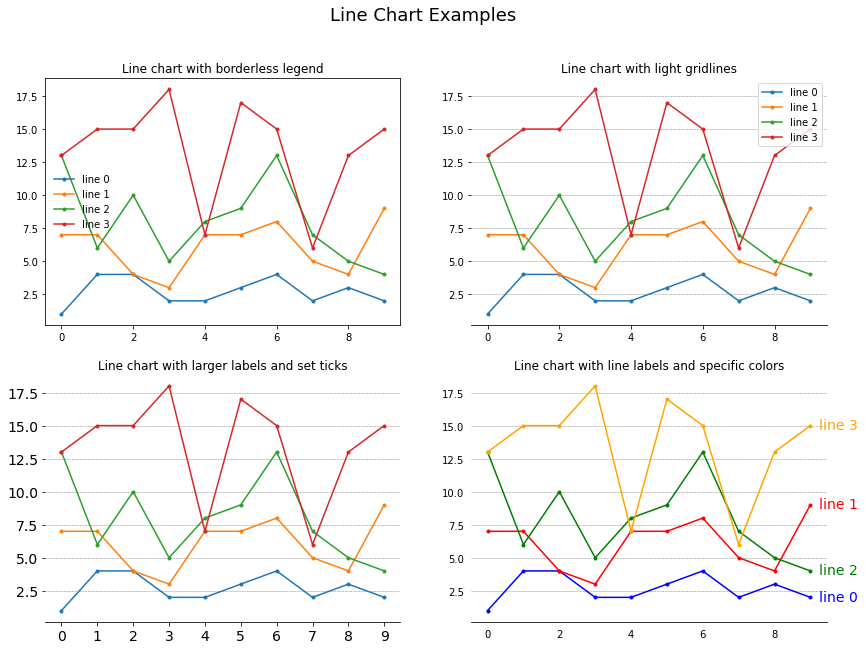

In [14]:
fig = plt.figure(figsize=(14, 10))
fig.suptitle('Line Chart Examples', fontsize=18, ha='center')

ax = fig.add_subplot(221)
for index, line in enumerate(lines):
    ax.plot(line[0], line[1], '.-', label='line {}'.format(index))
ax.legend(frameon=False)
ax.set_title('Line chart with borderless legend')

bx = fig.add_subplot(222)
for index, line in enumerate(lines):
    bx.plot(line[0], line[1], '.-', label='line {}'.format(index))
bx.legend(loc='upper right')

# Remove some of the plot frame lines
bx.spines['top'].set_visible(False)
bx.spines['right'].set_visible(False)
bx.spines['left'].set_visible(False)

# add light y-axis lines
bx.grid(True, 'major', 'y', ls='--', lw=.5, c='grey')
    
bx.set_title('Line chart with light gridlines')

cx = fig.add_subplot(223)
for index, line in enumerate(lines):
    cx.plot(line[0], line[1], '.-', label='line {}'.format(index))

# Remove some of the plot frame lines
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)
cx.spines['left'].set_visible(False)

# add light y-axis lines
cx.grid(True, 'major', 'y', ls='--', lw=.5, c='grey')

# set x ticks
cx.set_xticks(range(10))

cx.tick_params(axis='both', which='both', labelsize=14) #axis = 'x', 'y', or 'both'
cx.set_title('Line chart with larger labels and set ticks')

dx = fig.add_subplot(224)
for index, line in enumerate(lines):
    dx.plot(line[0], line[1], '.-', color=colors[index], label='line {}'.format(index))
    dx.text(line[0][-1] + 0.25, line[1][-1] - 0.25, 'line {}'.format(index), fontsize=14, color=colors[index])

# Remove some of the plot frame lines
dx.spines['top'].set_visible(False)
dx.spines['right'].set_visible(False)
dx.spines['left'].set_visible(False)

# remove the ticks from the axes
dx.tick_params(axis='both', which='both', bottom=False, left=False)

# add light y-axis lines
dx.grid(True, 'major', 'y', ls='--', lw=.5, c='grey')

dx.set_title('Line chart with line labels and specific colors')

plt.show()

### Bar charts

In [9]:
bar_points = [range(10), [random.choice(range(10)) for a in range(10)]]
sorted_points = sorted(zip(bar_points[0], bar_points[1]), key=lambda x: x[1])

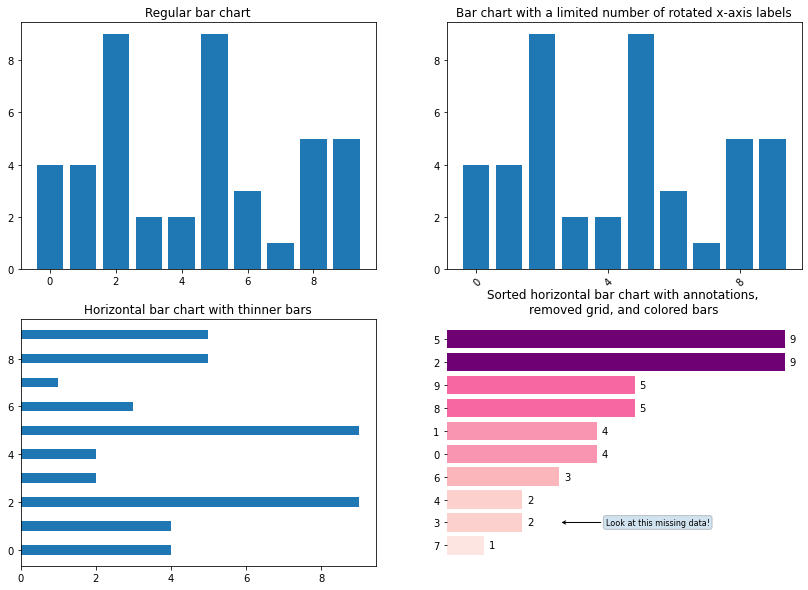

In [15]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(221)
ax.bar(bar_points[0], bar_points[1], align='center')
ax.set_title('Regular bar chart')

bx = fig.add_subplot(222)
bx.bar(bar_points[0], bar_points[1], align='center')
bx.set_title('Bar chart with a limited number of rotated x-axis labels')
bx.set_xticks(range(10))
plt.setp(bx.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
bx.xaxis.set_major_locator(plt.MaxNLocator(3))

cx = fig.add_subplot(223)
cx.barh(bar_points[0], bar_points[1], align='center', height=0.4)
cx.set_title('Horizontal bar chart with thinner bars')

dx = fig.add_subplot(224)
cmap = plt.cm.get_cmap('RdPu')
norm = col.Normalize(0, 10)
bh = dx.barh(range(10), [a[1] for a in sorted_points], color=[cmap(norm(a[1])) for a in sorted_points])
dx.set_title('Sorted horizontal bar chart with annotations, \nremoved grid, and colored bars')
dx.set_yticks(range(len(sorted_points)))
dx.set_yticklabels([a[0] for a in sorted_points])


for index, item in enumerate(sorted_points):
    dx.annotate(item[1], (item[1], index), xytext=(5, 0), \
                 textcoords="offset points", va='center', ha='left') 
    
dx.annotate('Look at this missing data!', xy=(3, 1),
                xytext=(7, 1),
                va="center", ha="right", fontsize=8,
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(arrowstyle="->"),)

dx.spines['top'].set_visible(False)
dx.spines['right'].set_visible(False)
dx.spines['left'].set_visible(False)
dx.spines['bottom'].set_visible(False)
dx.tick_params(axis='both', which='both', bottom=False, labelbottom=False)

plt.show()

### Scatter plot

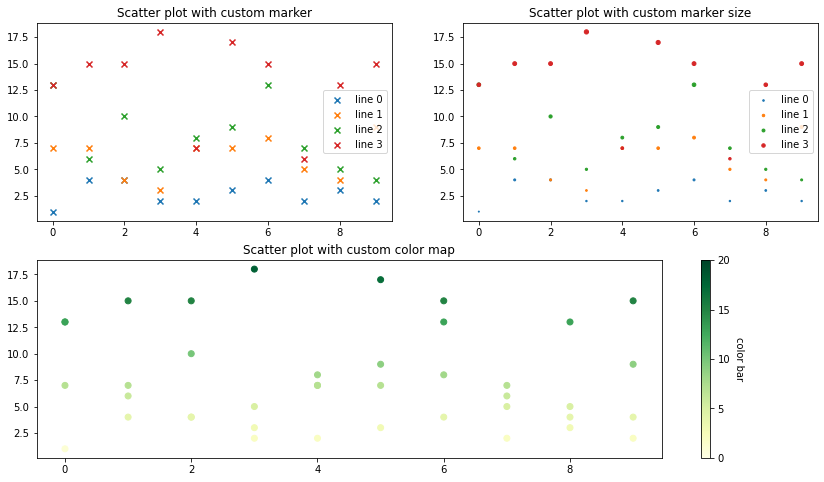

In [11]:
fig = plt.figure(figsize=(14, 8))

ax = plt.subplot2grid((2, 2), (0, 0))
for index, line in enumerate(lines):
    ax.scatter(line[0], line[1], marker='x', label='line {}'.format(index))
ax.legend()
ax.set_title('Scatter plot with custom marker')

bx = plt.subplot2grid((2, 2), (0, 1))
for index, line in enumerate(lines):
    bx.scatter(line[0], line[1], marker='o', s=line[1], label='line {}'.format(index))
bx.legend()
bx.set_title('Scatter plot with custom marker size')

cx = plt.subplot2grid((2, 2), (1, 0), colspan=2)
for index, line in enumerate(lines):
    sc = cx.scatter(line[0], line[1], marker='o', cmap='YlGn', c=line[1], vmin=0, vmax=20)
cx.set_title('Scatter plot with custom color map')
cbar = cx.figure.colorbar(sc)
cbar.ax.set_ylabel("color bar", rotation=-90, va="bottom")
cbar.set_ticks(range(0, 25, 5))

plt.show()

### Time plots

In [2]:
import datetime
import matplotlib.dates as mdates

In [9]:
# generate data
num_points = 50
current_datetime = datetime.datetime.strptime('01/01/2019 00:00:00', '%m/%d/%Y %H:%M:%S')
categories = ['item', 'msg', 'sound', 'email', 'alert']

datetimes = []

# generate the datetimes
for item in range(num_points):
    # add the current time to our collection and calculate the next one
    dt_entry = {'datetime': current_datetime}
    current_datetime += datetime.timedelta(days=1)
    
    # generate the category flag
    for category in categories:
        dt_entry[category] = random.randrange(20)
        
    datetimes.append(dt_entry)

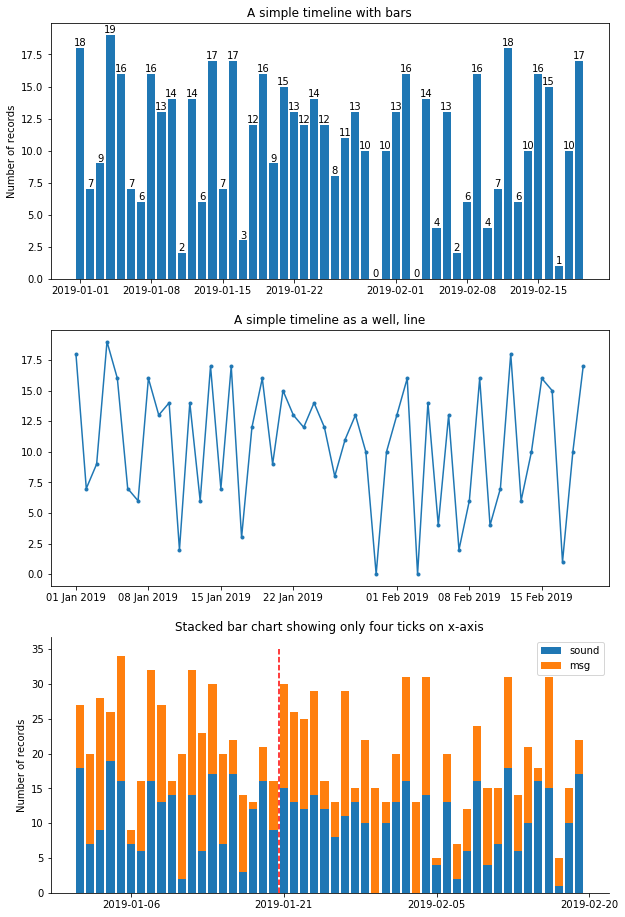

In [31]:
fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(311)
rects = ax.bar([a['datetime'] for a in datetimes], [a['sound'] for a in datetimes])
ax.set_ylabel('Number of records')

# add bar labels
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,\
            '%d' % int(height), ha='center', va='bottom')    
    
ax.set_title('A simple timeline with bars')

bx = fig.add_subplot(312)
bx.plot([a['datetime'] for a in datetimes], [a['sound'] for a in datetimes], '.-')
bx.set_title('A simple timeline as a well, line')
bx.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))


cx = fig.add_subplot(313)
cx.bar([a['datetime'] for a in datetimes], [a['sound'] for a in datetimes], label='sound')
cx.bar([a['datetime'] for a in datetimes], [a['msg'] for a in datetimes], bottom=[a['sound'] for a in datetimes], \
       label='msg')
cx.vlines(datetime.datetime(2019, 1, 20, 12, 0), 0, 35, ls='--', colors='r')
cx.set_ylabel('Number of records')
cx.set_title('Stacked bar chart showing only four ticks on x-axis')
cx.xaxis.set_major_locator(plt.MaxNLocator(4))
cx.spines['top'].set_visible(False)
cx.spines['right'].set_visible(False)
cx.legend()

plt.show()

In [3]:
# generate more data
num_points = 50
current_datetime = datetime.datetime.strptime('01/01/2019 00:00:00', '%m/%d/%Y %H:%M:%S')
items = []

# generate the datetimes
for item in range(num_points):
    # add the current time to our collection and calculate the next one
    items.append({'datetime': current_datetime, \
                  'value': random.randrange(2000)})
    current_datetime += datetime.timedelta(days=1)

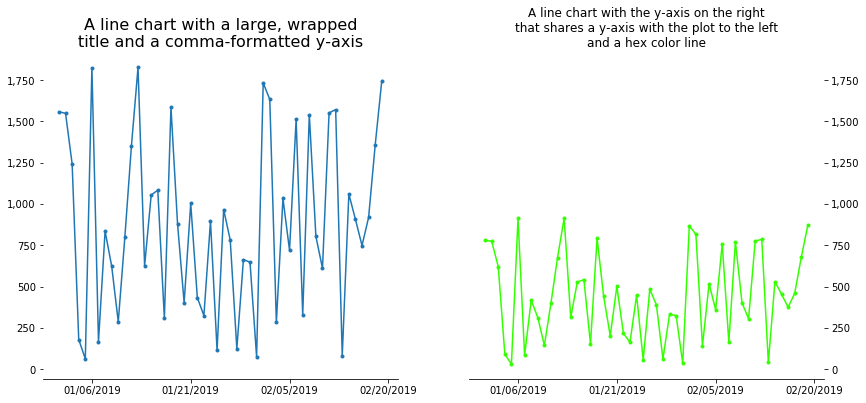

In [27]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
ax.plot([a['datetime'] for a in items], [a['value'] for a in items], '.-')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))    
ax.set_title('A line chart with a large, wrapped\ntitle and a comma-formatted y-axis', fontsize=16)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

bx = fig.add_subplot(122, sharey=ax)
bx.plot([a['datetime'] for a in items], [a['value']/2 for a in items], '.-', c='#33ff00')
bx.set_title('A line chart with the y-axis on the right\nthat shares a y-axis with the plot to the left\nand a hex color line')
bx.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
bx.xaxis.set_major_locator(plt.MaxNLocator(4))
bx.spines['top'].set_visible(False)
bx.spines['right'].set_visible(False)
bx.spines['left'].set_visible(False)
bx.yaxis.tick_right()
plt.show()